In [1]:
# 2-3 popular
# 데이터 셋 링크
# https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data

In [2]:
import pandas as pd

In [7]:
names1880 = pd.read_csv('./data/2.3 names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [10]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [24]:
years = range(1880, 2018)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = './data/2.3 names/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1925008,Zykai,M,5,2017
1925009,Zykeem,M,5,2017
1925010,Zylin,M,5,2017
1925011,Zylis,M,5,2017


In [17]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2013,1751320,1888009
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837


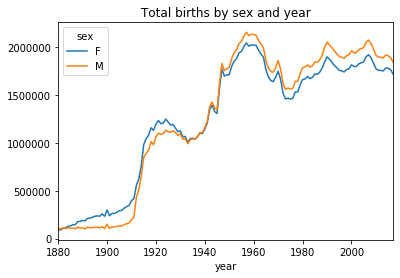

In [19]:
total_births.plot(title='Total births by sex and year')

In [31]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1925008,Zykai,M,5,2017,0.000003
1925009,Zykeem,M,5,2017,0.000003
1925010,Zylin,M,5,2017,0.000003
1925011,Zylis,M,5,2017,0.000003


In [32]:
import numpy as np

In [33]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [35]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [40]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
275872,Camron,M,203,2017,0.000110
275873,Decker,M,203,2017,0.000110
275874,Tyrone,M,203,2017,0.000110
275875,Howard,M,202,2017,0.000110


In [38]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])

top1000 = pd.concat(pieces, ignore_index=True)

In [39]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
275872,Camron,M,203,2017,0.000110
275873,Decker,M,203,2017,0.000110
275874,Tyrone,M,203,2017,0.000110
275875,Howard,M,202,2017,0.000110
